## Hotel Booking Exploration

### by Sanan Yahyazade

In [1]:
# importing appropirate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.shape

(119390, 32)

In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Structure of dataset
There are 119390 bookings in the dataset with 32 features. Most variables are categoric in nature.



### Main features of interest in dataset

I'm most interested in figuring out which features are affects on potential tourists booking behavior.

### Features in the dataset will help support investigation 

I expect that, planned travel time, hotel type and price will affect tourists' booking behavior

## Univariate Exploration

#### What is the number of different hotel types in dataset?

In [70]:
def mycountplot(df, xVar, color =sb.color_palette()[0], order = None) :
    ''' This function will let us to avoid repitation of the code, and will use to create count plot '''
    plt.figure(figsize = [14, 6])
    sb.countplot(data = df, x = xVar, edgecolor = 'black', color = color, order = order)
    xVar = xVar.replace('_',' ')
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

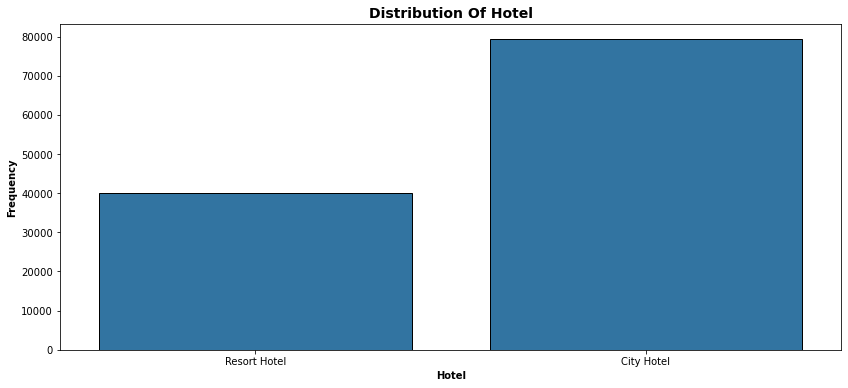

In [71]:
mycountplot(hotel, 'hotel')

According to the dataset, there are 80k visitors resereved a hotel room in city hotels which is two times more than resort hotels.

#### Which market channels are used most by guests to book a hotel room ?

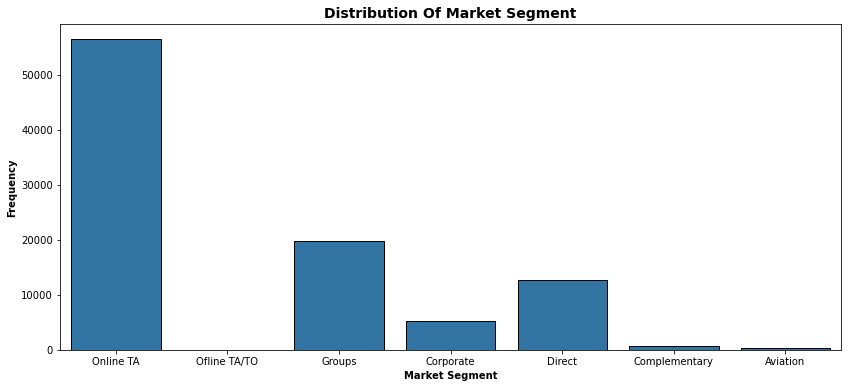

In [72]:
mycountplot(hotel,'market_segment')

As graph shows, most famous market chanel to book hotel room is online tourism agencies with 50k, offline tourism agencies and group reservation are also among top three market segment. Complementary and aviation are chosen by guests rarely. 

#### Which type of rooms are reserved by guests mostly?

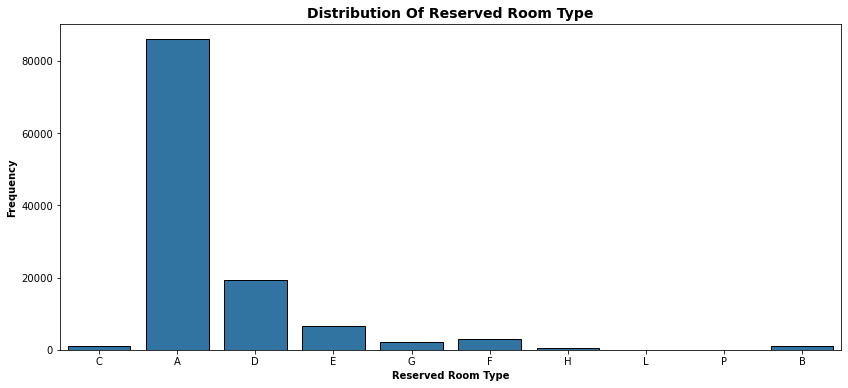

In [73]:
mycountplot(hotel, 'reserved_room_type')

The graph indicates that, A type room has been chosen by guests mostly. the price and the number of the A type rooms might affect the guests preference 

#### Which year hotels accomodiate most guests ? 

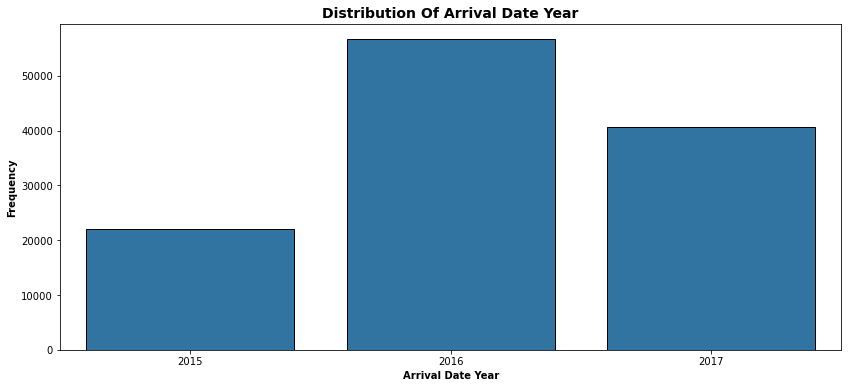

In [74]:
mycountplot(hotel, 'arrival_date_year')

According to dataset, most visited year is 2016 with 50k guests. However current dataset do not include whole data for year 2015, therefore this results might not show the real numbers

#### Which months hotels accomodiate most guests ? 

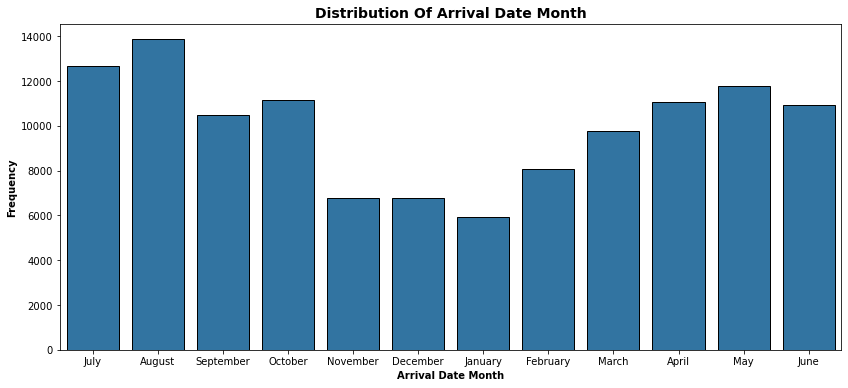

In [75]:
mycountplot(hotel,'arrival_date_month')

Result shows that, guests mostly prefere to visit in summer months. it indicates that, there is a seasnoality in the region

## Bivariate Exploration

#### How Average Daily Rate changes in terms of weeks ?

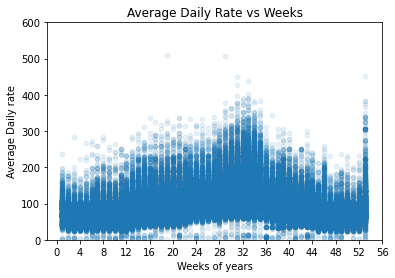

In [82]:
#plotting weeks against adr to see changes in adr

hotel.plot(kind = 'scatter', x = 'arrival_date_week_number', y = 'adr', xticks = np.arange(0, hotel['arrival_date_week_number'].max()+4,4), alpha = 1/10)
plt.ylim(0,600)
plt.ylabel('Average Daily rate')
plt.xlabel('Weeks of years')
plt.title('Average Daily Rate vs Weeks');

Results show that, average daily rate increases in summer weeks of the year. increases also can be witnessed in the last week of the year. It happens probably because of the holiday week.

#### Next we will look at adr changes seperately for each hotel type

#### Resort hotel - cleaning

In [15]:
#here wele select from hotel dataset results only for Resort hotel

resort_h = hotel[hotel['hotel'] == 'Resort Hotel']

In [16]:
# wee will look only not canceled reservations
resort_h = resort_h[resort_h['is_canceled'] == 0]

In [17]:
# calculation price for per person for Resort hotel
resort_h['price_per_person'] = resort_h['adr'] / resort_h['adults'] + resort_h['children']

In [18]:
# selecting datas where ppp is not 0
resort_h = resort_h[resort_h['price_per_person'] != 0.000]

In [19]:
# as adr can not be neqative, we will delete negative values
adr_neg = resort_h[resort_h['adr'] < 0.000]

In [20]:
adr_neg

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,price_per_person
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,-3.19


In [21]:
resort_h = resort_h.drop(index=14969)

In [22]:
#here we replace null or 0 values with average of adr
resort_h['adr'].replace(0,resort_h['adr'].mean(axis=0),inplace=True)

In [23]:
#here we replace null or 0 values with average of ppp
resort_h["price_per_person"] = resort_h["price_per_person"].fillna(value=resort_h["price_per_person"].mean())

#### Plotting
#### How ADR changes over the weeks in Resort hotel ?

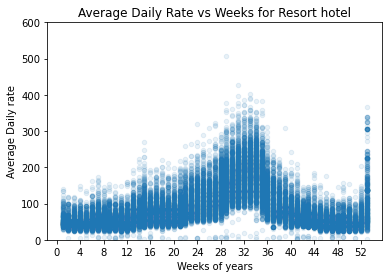

In [24]:
resort_h.plot(kind = 'scatter', x = 'arrival_date_week_number', y = 'adr', xticks = np.arange(0, resort_h['arrival_date_week_number'].max(),4), alpha = 1/10)
plt.ylim(0,600)
plt.ylabel('Average Daily rate')
plt.xlabel('Weeks of years')
plt.title('Average Daily Rate vs Weeks for Resort hotel');

 Here seasonality can be seen as well, as it is resort hotel, people prefer to visit in summer weeks, as well as last week of the year because of New Year holiday. as people visit mostly these weeks, ADR increases.

### City hotel
#### Cleaning

In [25]:
# Same applies for city hotels

city_h = hotel[hotel['hotel'] == 'City Hotel']

In [26]:
city_h = city_h[city_h['is_canceled'] == 0]

In [27]:
city_h['price_per_person'] = city_h['adr'] / city_h['adults'] + city_h['children']

In [28]:
city_h['adr'].replace(0,city_h['adr'].mean(axis=0),inplace=True)

In [29]:
city_h["price_per_person"] = city_h["price_per_person"].fillna(value=resort_h["price_per_person"].mean())

#### Plotting
#### How ADR changes in terms of weeks in City hotel ?

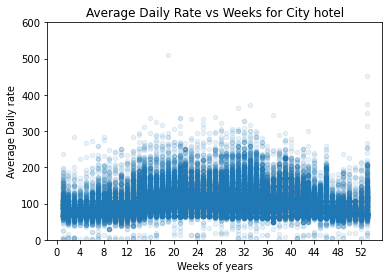

In [30]:
city_h.plot(kind = 'scatter', x = 'arrival_date_week_number', y = 'adr', xticks = np.arange(0, city_h['arrival_date_week_number'].max(),4), alpha = 1/10)
plt.ylim(0,600)
plt.ylabel('Average Daily rate')
plt.xlabel('Weeks of years')
plt.title('Average Daily Rate vs Weeks for City hotel');

Unlike to resort hotels, adr stays stable in city hotels and minimum adr is slighly higher than resort hotels

#### Resort and city hotel, room type vs price per person

#### How cost of the each room type differs for each room type ?

Text(0.5, 1.0, 'price per person for each room type in Resort hotel')

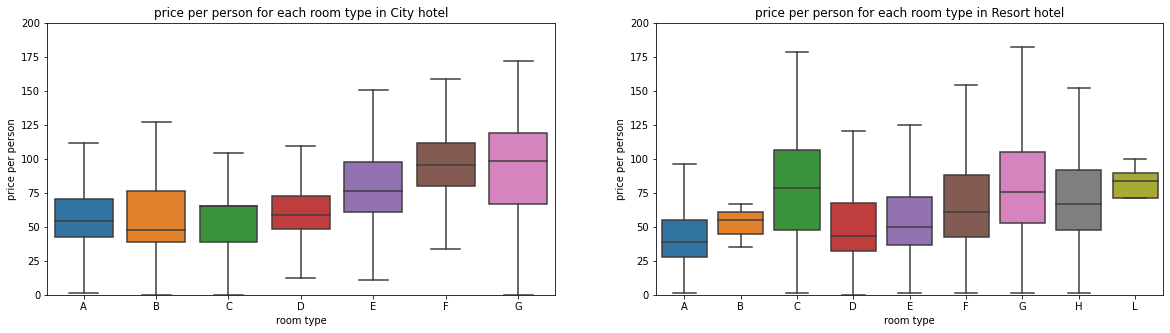

In [31]:
# plotting boxplot to see changes of ppp for each room type in each hotel type
color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols=2, figsize = [20,5])

ax1 = sb.boxplot(x="reserved_room_type", y="price_per_person", data=city_h, order= ['A','B','C','D','E', 'F', 'G'], fliersize=0, ax = ax[0])
ax1.set_ylim([0, 200])
ax1.set_ylabel('price per person')
ax1.set_xlabel('room type')
ax1.set_title('price per person for each room type in City hotel');

ax2 = sb.boxplot(x="reserved_room_type", y="price_per_person", data=resort_h,order= ['A','B','C','D','E', 'F', 'G','H','L'], fliersize=0, ax = ax[1])
ax2.set_ylim([0, 200])
ax2.set_ylabel('price per person')
ax2.set_xlabel('room type')
ax2.set_title('price per person for each room type in Resort hotel')


According to results, price per person is different for each hotel room types. A and B room types cost almost same.  however, type C rooms are more expensive in Resort hotels than City hotels.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
It has been found out that, in resort hotets prices are significiantly high in summer season. However at the last week of the year, prices increase dramaticaly, probably because of the holiday.

For the city hotels, most of the weeks prices do not change,  however at the last week of the year same tentency with resort hotels can be witnessed


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In terms of different hotel room types, it seems that, city offers same hotel types relatively more expensive than resort hotel. C type hotel room are expection,  because resort hotels offers this type of room with higher price than others.


### Multivariate exploration

#### What was the percentage of cancelation over the months for different hotel types?

##### Finding hotel cancelation percentage 

In [32]:
# we will create a data frame which includes booking counts. cancelation counts and canelation percentage

hotel_booking = hotel.groupby(['hotel', 'arrival_date_month']).count()['is_canceled'].reset_index()

In [33]:
hotel_booking_canceled = hotel.groupby(['hotel', 'arrival_date_month']).sum()['is_canceled'].reset_index()

In [34]:
hotel_booking_canceled['booking'] = hotel_booking['is_canceled']

In [35]:
hotel_booking_canceled.head()

,hotel,arrival_date_month,is_canceled,booking
0,City Hotel,April,3465,7480
1,City Hotel,August,3602,8983
2,City Hotel,December,1740,4132
3,City Hotel,February,1901,4965
4,City Hotel,January,1482,3736


In [36]:
# adding column which includes canelation percentage
hotel_booking_canceled['cancelation_per'] = hotel_booking_canceled['is_canceled'] / hotel_booking_canceled['booking'] * 100

In [37]:
hotel_booking_canceled.head()

,hotel,arrival_date_month,is_canceled,booking,cancelation_per
0,City Hotel,April,3465,7480,46.323529
1,City Hotel,August,3602,8983,40.097963
2,City Hotel,December,1740,4132,42.110358
3,City Hotel,February,1901,4965,38.288016
4,City Hotel,January,1482,3736,39.668094


<Figure size 720x576 with 0 Axes>

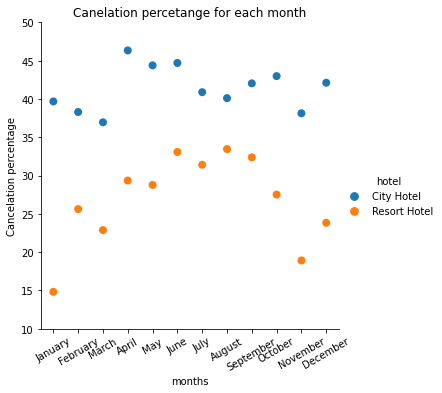

In [38]:
plt.figure(figsize=[10, 8])

months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.catplot(data= hotel_booking_canceled, x = 'arrival_date_month', y = 'cancelation_per', kind = 'swarm', s = 8,hue = 'hotel', order = months)
plt.xticks(rotation = 30)
plt.ylim(10, 50)
plt.ylabel('Cancelation percentage')
plt.xlabel('months')
plt.title('Canelation percetange for each month');

Graph shows that, cancelation rate are much higher in city hotels than resort hotels. Different aspects could affect this result such as number of bookings. 

#### How number of bookings changes over the month for each hotel type ?

<Figure size 720x576 with 0 Axes>

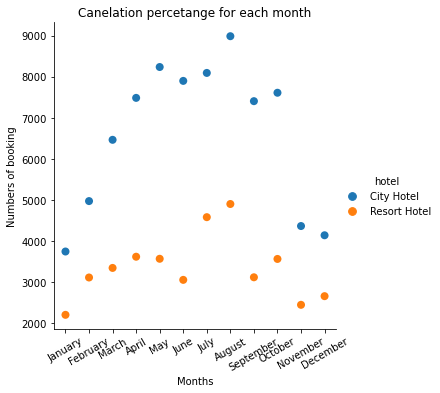

In [39]:
plt.figure(figsize=[10, 8])

months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.catplot(data= hotel_booking_canceled, x = 'arrival_date_month', y = 'booking', kind = 'swarm', s = 8,hue = 'hotel', order = months)
plt.xticks(rotation = 30)
plt.ylabel('Numbers of booking')
plt.xlabel('Months')
plt.title('Canelation percetange for each month');

Here we can see that, number of bookings are higher in city hotels than resort hotels which might affect the cancelation rate.

#### What is the relation between booking number and cancelation rate ?

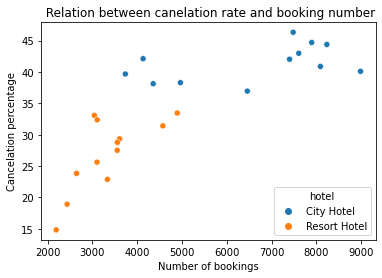

In [40]:
months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']


sb.scatterplot(data= hotel_booking_canceled, x = 'booking', y = 'cancelation_per',hue = 'hotel')

plt.ylabel('Cancelation percentage')
plt.xlabel('Number of bookings')
plt.title(' Relation between canelation rate and booking number');

Number of bookings and cancelation rate are positively correlated. It indicates that, high booking numbers in hotels, will increase cancelation rate.

In [41]:
# Replacing o values in adr column with mean value of adr
hotel['adr'].replace(0,hotel['adr'].mean(axis=0),inplace=True)

In [42]:
# Finding negative adr value and droping 
neg_adr = hotel[hotel['adr'] < 0.000]

In [43]:
hotel = hotel.drop(index=14969)

In [44]:
hotel["adr"] = hotel['adr'].astype('int')

In [45]:
# here we drop nan values from children column
hotel = hotel.dropna(subset=['children'])

In [46]:
hotel["children"].isnull().sum()

0

In [47]:
hotel["children"] = hotel['children'].astype('int')

In [48]:
hotel['price_per_person'] = hotel['adr'] / hotel['adults'] + hotel['children']

In [49]:
hotel["price_per_person"] = hotel['price_per_person'].round()

In [50]:
hotel['price_per_person'] = hotel['price_per_person'].fillna(value=hotel['price_per_person'].mean())

In [51]:
#extracting reservations which are not canceled
hotel_not_canceled = hotel[hotel['is_canceled'] == 0]

In [52]:
# Replacing 0 values with mean value of price per person column

hotel_not_canceled['price_per_person'].replace(0,hotel_not_canceled['price_per_person'].mean(axis=0),inplace=True)

/var/folders/10/qztlx7hn6l3g4_w_tpm4z9m80000gn/T/ipykernel_17306/4276124329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_not_canceled['price_per_person'].replace(0,hotel_not_canceled['price_per_person'].mean(axis=0),inplace=True)


#### How price per person has changed over months?

In [53]:
ppp_month = hotel_not_canceled.copy()

In [54]:
ppp_month = ppp_month[['hotel', 'arrival_date_month','price_per_person' ]]

In [55]:
ppp_month

,hotel,arrival_date_month,price_per_person
0,Resort Hotel,July,50.0
1,Resort Hotel,July,50.0
2,Resort Hotel,July,75.0
3,Resort Hotel,July,75.0
4,Resort Hotel,July,49.0
...,...,...,...
119385,City Hotel,August,48.0
119386,City Hotel,August,75.0
119387,City Hotel,August,78.0
119388,City Hotel,August,52.0


In [56]:
# current dataframe contains inf values
ppp_month.isin([np.inf]).sum()

hotel                   0
arrival_date_month      0
price_per_person      301
dtype: int64

In [57]:
''' Some of the values' type in ppp_month dataframe is inf type which is not allow us to plot results appropriately. 
    Therefore these values will be replaced with nan values and be drooped  '''

ppp_month.replace([np.inf, -np.inf], np.nan, inplace=True)

In [58]:
ppp_month.dropna(inplace=True)

In [59]:
ppp_month = ppp_month.groupby(['hotel', 'arrival_date_month']).mean()['price_per_person'].reset_index()

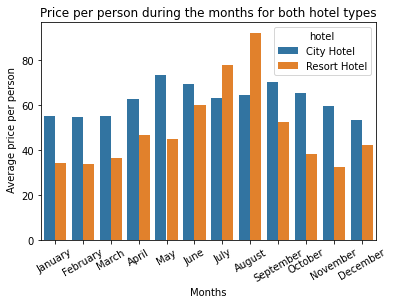

In [60]:
months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']

sb.barplot(data = ppp_month, x = 'arrival_date_month', y = 'price_per_person', hue = 'hotel', order = months)
plt.xticks(rotation = 30)
plt.ylabel(' Average price per person')
plt.xlabel('Months')
plt.title('Price per person during the months for both hotel types');

In Resort hotels price increaces regularly from the beginning of the year and reach its peak in August, then, dramadic decrace in price is being witnessed. However in City hotels price is fluctiationg thorughout the year. From the graph it can bele concluded that, in result hotels there is high seasonality againinst city hotels.

####  Here we will look at, how number of visitors affects price per person


#### How price per person affects the cancelation rate ?


In [61]:
guest_numbers= hotel_not_canceled.groupby(['hotel','arrival_date_month']).sum()['adults'].reset_index()
visitor_price = guest_numbers
visitor_price['price_per_person'] = ppp_month['price_per_person']
visitor_price.head()

,hotel,arrival_date_month,adults,price_per_person
0,City Hotel,April,7665,62.593445
1,City Hotel,August,10528,64.266741
2,City Hotel,December,4393,53.277307
3,City Hotel,February,5369,54.698157
4,City Hotel,January,3779,54.957028


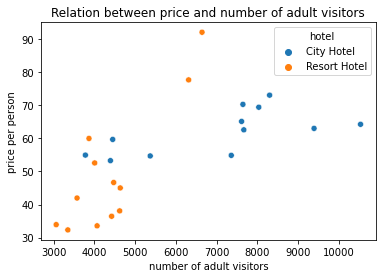

In [62]:
sb.scatterplot( data = visitor_price, x = 'adults', y = 'price_per_person', hue = 'hotel');
plt.ylabel('price per person')
plt.xlabel('number of adult visitors')
plt.title('Relation between price and number of adult visitors');

According to the graph, changes in number of visitors do not affect price per person in both hotel types.  

#### How price per person in hotels affect cancelation rate ?

In [63]:
# Creating data frame which includes cancelation percentage and price per person columns
cancelation_price = hotel_booking_canceled.loc[:, ['hotel', 'arrival_date_month', 'cancelation_per']]
cancelation_price['price_per_person'] = visitor_price['price_per_person']
cancelation_price.head()

,hotel,arrival_date_month,cancelation_per,price_per_person
0,City Hotel,April,46.323529,62.593445
1,City Hotel,August,40.097963,64.266741
2,City Hotel,December,42.110358,53.277307
3,City Hotel,February,38.288016,54.698157
4,City Hotel,January,39.668094,54.957028


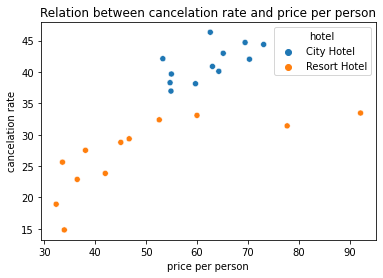

In [64]:
sb.scatterplot( data = cancelation_price, x = 'price_per_person', y = 'cancelation_per', hue = 'hotel')
plt.ylabel('cancelation rate')
plt.xlabel('price per person')
plt.title('Relation between cancelation rate and price per person');

Unlike the previous graph, here we can see that, relation between cancelation rate and price per person is positive. as the price increases, visitors are more likely tend to cancel the reservation.

#### How number of guests  changes over the each month?

In [65]:
guest_numbers= hotel_not_canceled.groupby(['hotel','arrival_date_month']).sum()['adults'].reset_index()

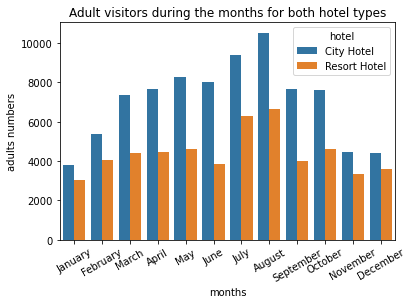

In [66]:
months =['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December']

sb.barplot(x ='arrival_date_month', y ='adults', data = guest_numbers, hue ='hotel', order= months)
plt.xticks(rotation = 30)
plt.ylabel('adults numbers')
plt.xlabel('months')
plt.title('Adult visitors during the months for both hotel types');

Graph shows that, both hotel types receive more guests in summer months. Comparing with the graph above, it seems that unlike the resort hotels,  number of guests do not affect much on price person in city hotels.

#### Which market segments have been used for hotel booking ?

In [67]:
market_seg = hotel.groupby(['hotel','market_segment']).sum()['adults'].reset_index()

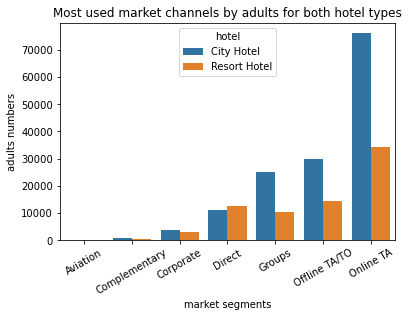

In [68]:
sb.barplot(x ='market_segment', y ='adults', data = market_seg, hue ='hotel')
plt.xticks(rotation = 30)
plt.ylabel('adults numbers')
plt.xlabel('market segments')
plt.title('Most used market channels by adults for both hotel types');


Online tourism agencies are more popular among potential tourists. For hotel types, OTAs are used mostly. Ofline tourism agencies and group reservations are 2nd and 3rd popular market segments respectively.

#### How lead time affected cancelation of reservation for each market segment ?

/Users/sananyahyazade/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Relation between cancelation and lead time')

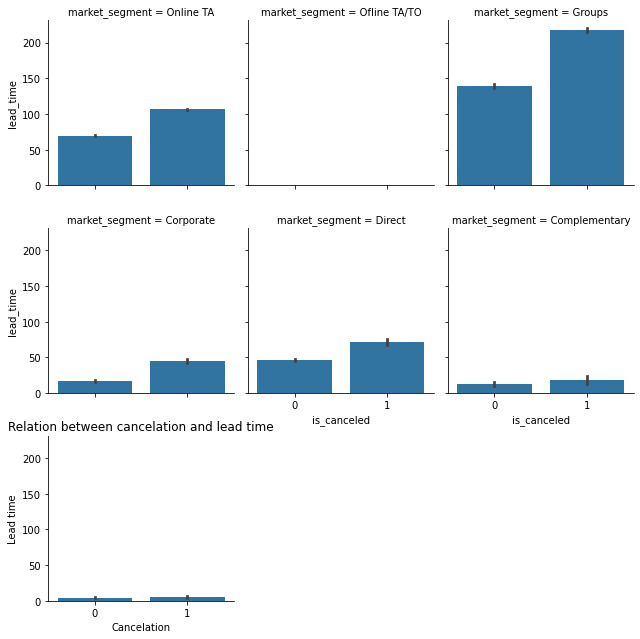

In [69]:
market_segment = ['Online TA', 'Ofline TA/TO', 'Groups', 'Corporate', 'Direct', 'Complementary', 'Aviation']

hotel["market_segment"] = pd.Categorical(hotel["market_segment"], categories=market_segment, ordered=True)

g = sb.FacetGrid(hotel, col="market_segment", col_wrap= 3)
g.map(sb.barplot, "is_canceled", "lead_time")
plt.ylabel('Lead time')
plt.xlabel('Cancelation')
plt.title('Relation between cancelation and lead time')

It is obvious that, long lead time increase the likelihood of the cancelation .  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I this part of exploration, we found out that, cancelation rate are positively correlated with number of guests and price per person. Beyod that, it has been revealed that, as potential tourist spend more time during the pre visit phase, they tenf to cancel the reservation. 

### Were there any interesting or surprising interactions between features?
Additionaly, we saw that, guests for both hotel types are mostly use online tourism agencies to book their next travel
